# Data Preparation and Validation Techniques

## Machine Learning Methods 


### Module 2: Data Preparation and Validation Techniques

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">


1. Data Loading, Understanding, and Filtering (https://youtu.be/FvlAINfSLyg)
    * Understanding data structure (input features, target variables, and types of data)
    * Descriptive statistics 
    * Data visualization for understanding distributions and relationships (e.g., histograms, scatter plots, correlation matrices)
2. Feature Engineering (https://youtu.be/CFA877KhPl0)
    * Feature scaling (standardization, normalization)
    * Feature transformation (e.g., polynomial features)
3. Data Splitting and Cross-Validation (https://youtu.be/brqCqB3xfX8)
    * Train-Test Split 
    * Validation Set (Role of a validation set in model tuning)
    * K-Fold Cross-Validation (Description and implementation)
    * Leave-One-Out Cross-Validation (LOOCV)
5. Pipelines for Automated Preprocessing (https://youtu.be/1sm0ZcVZK8c)
    * Integrating feature engineering and predictive modeling in `sklearn` pipelines

    

# 1. Data Loading, Understanding, and Filtering


* `pandas.read_csv` is a function to load CSV (Comma Separated Values) files into a Pandas DataFrame for analysis and manipulation.

* Here’s the general syntax for the `pandas.read_csv` function (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html):

```Python 
pandas.read_csv(
    filepath_or_buffer,        # Filepath or URL to the CSV file
    sep=',',                   # Delimiter (default is ',')
    header='infer',            # Row number to use as header (default is the first row)
    index_col=None,            # Column(s) to use as the index
    usecols=None,              # Columns to read (list of column names or indices)
)

```


In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/farhad-pourkamali/MATH4388Online/refs/heads/main/data/Auto.csv")


df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


* The **index rows** of a DataFrame can be accessed using the `.index` attribute

* The **column names** of a DataFrame can be accessed using the `.columns` attribute


In [2]:
# Check the index
print("Index Rows:")
print(df.index)

Index Rows:
RangeIndex(start=0, stop=397, step=1)


In [3]:
# Check column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


* Large datasets can have thousands of rows and columns.

* Displaying the entire DataFrame (`df`) floods the output, making it hard to read or find relevant information.

* `df.head()` returns only the first 5 rows by default.

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


* The `.info()` method in Pandas is used to provide a concise summary of a DataFrame, giving key information about the structure and contents of the data. It is especially useful for getting an overview of large datasets.

In [5]:
df.info() # Do you see any problems? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
df["horsepower"].iloc[0]

'130'

In [7]:
type(df["horsepower"].iloc[0])

str

In [8]:
# convert a column with str values to floats
# Convert non-numeric values (e.g., 'abc', '?', 'N/A') to NaN

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [10]:
# Count the number of NaN values

print(df['horsepower'].isnull().sum())

5


In [11]:
# Remove rows with at least one NaN

df_cleaned = df.dropna()

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [13]:
# Drop the column in-place
df_cleaned.drop(columns=["name"], inplace=True)

df_cleaned

/var/folders/2h/7xf4z7s958zdy8hvc14mq51r0000gn/T/ipykernel_32333/2635991985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=["name"], inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


* The `.describe()` method provides a statistical summary of numerical columns in a DataFrame.

In [14]:
df_cleaned.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


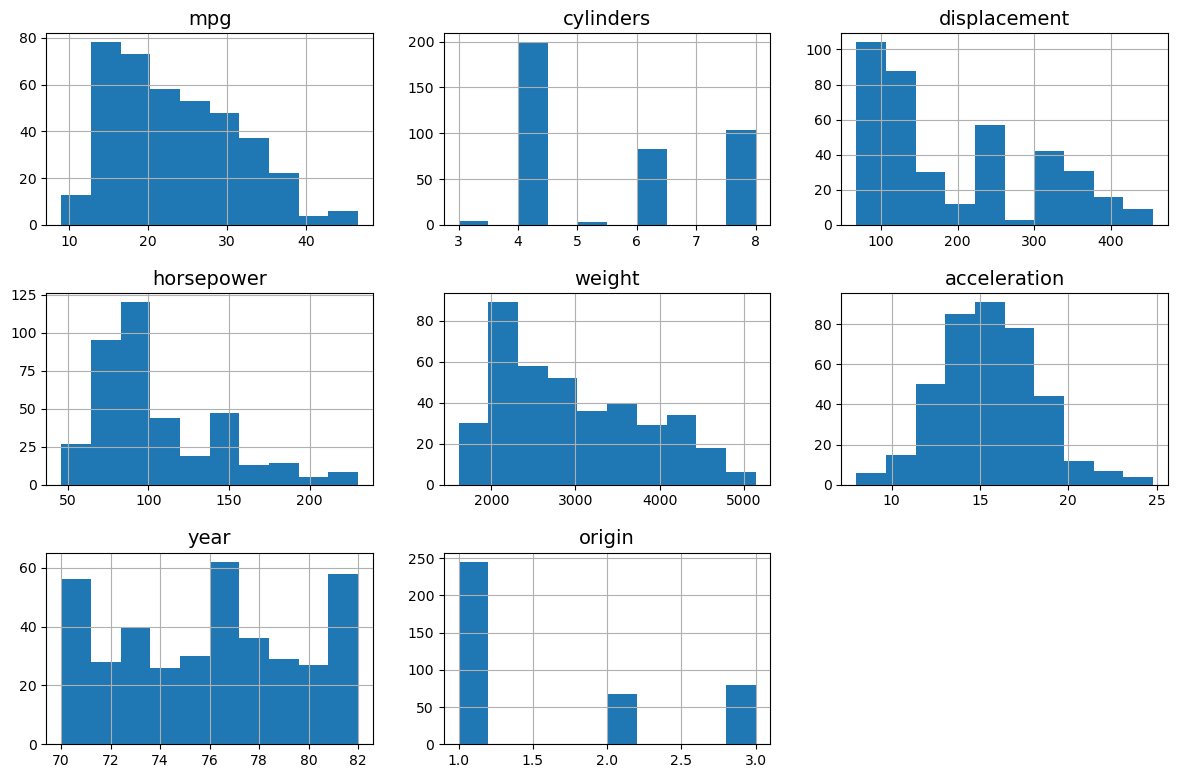

In [15]:
import matplotlib.pyplot as plt

# customization 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# histogram
df_cleaned.hist(bins=10, figsize=(12, 8))

plt.tight_layout()
plt.show()

* Seaborn (https://seaborn.pydata.org/index.html) is a Python library built on top of Matplotlib, designed to simplify the creation of complex and attractive statistical plots with minimal code.

* Seaborn works seamlessly with Pandas DataFrames.

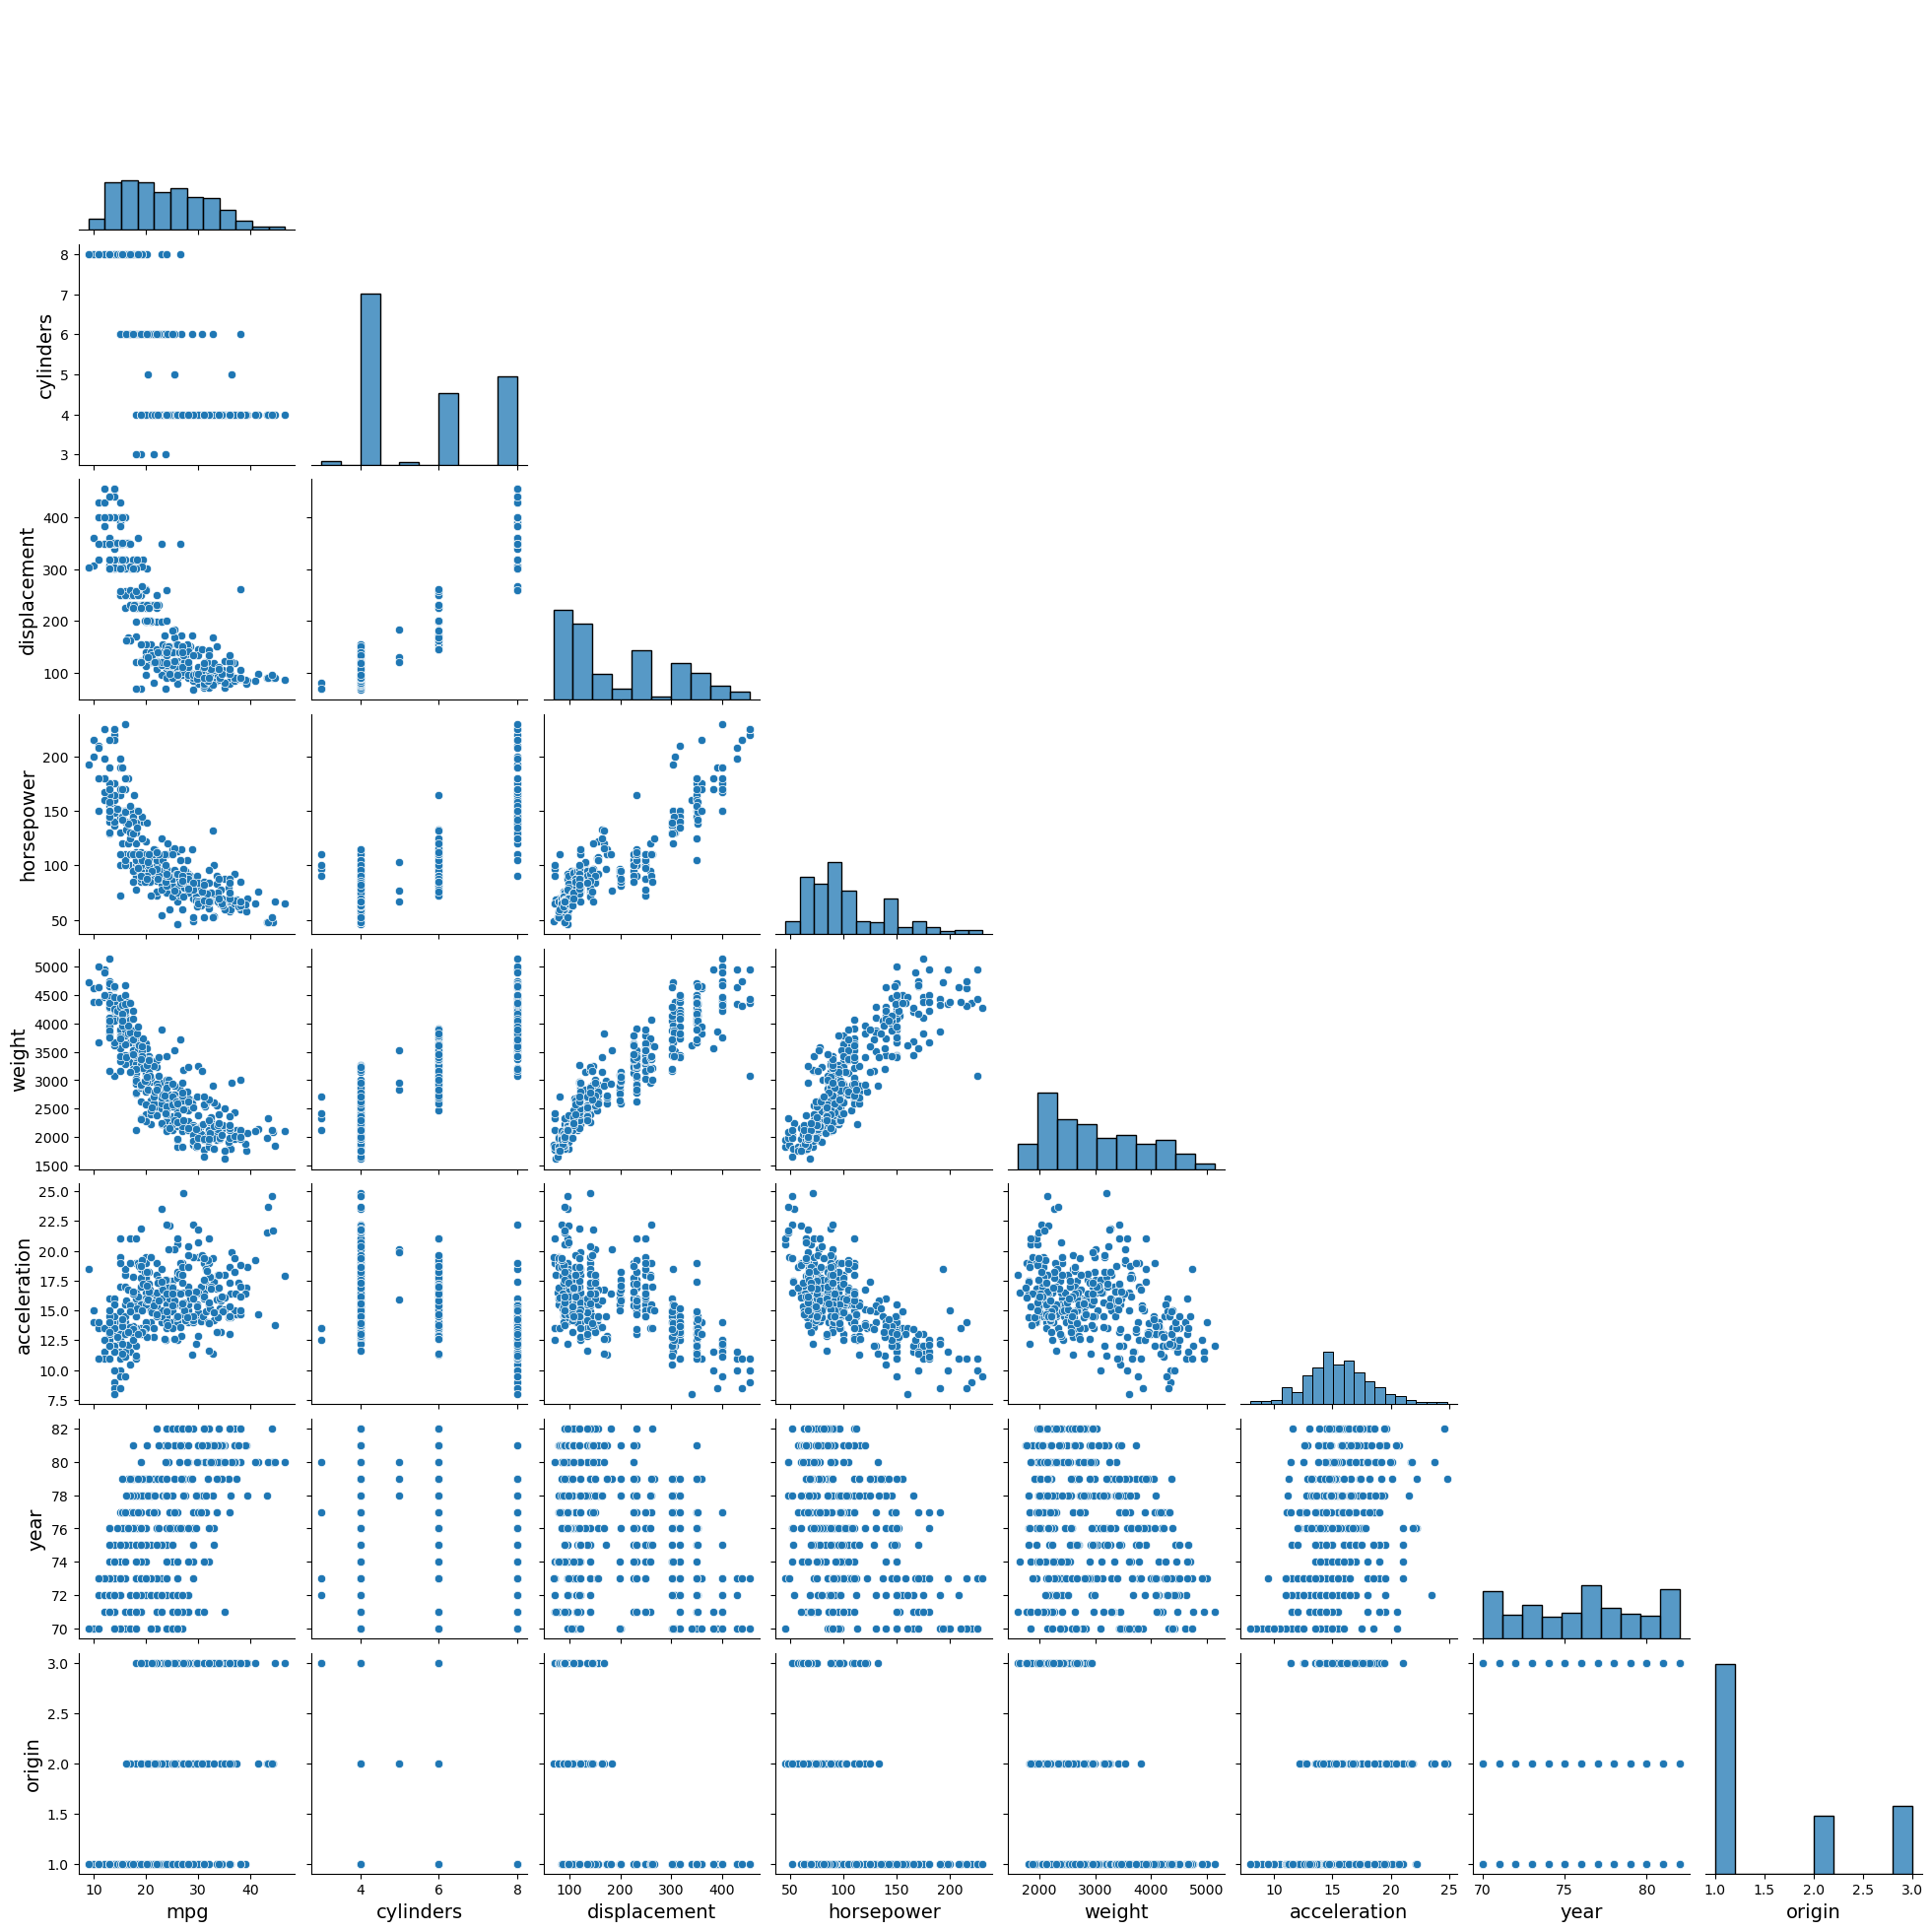

In [16]:
import seaborn as sns

sns.pairplot(df_cleaned, diag_kind='hist', corner=True)

plt.show()

For two vectors $\mathbf{x}$ and $\mathbf{y}$ (or columns of a DataFrame), the Pearson correlation coefficient $\rho$ is given by

\begin{equation*}
\rho = \frac{\sum_{i=1}^{n} (x_i - \bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{\mathbf{x}})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{\mathbf{y}})^2}}
\end{equation*}

* $\rho=1$: Perfect positive linear relationship
* $\rho=-1$: Perfect negative linear relationship
* $\rho=0$: No linear relationship


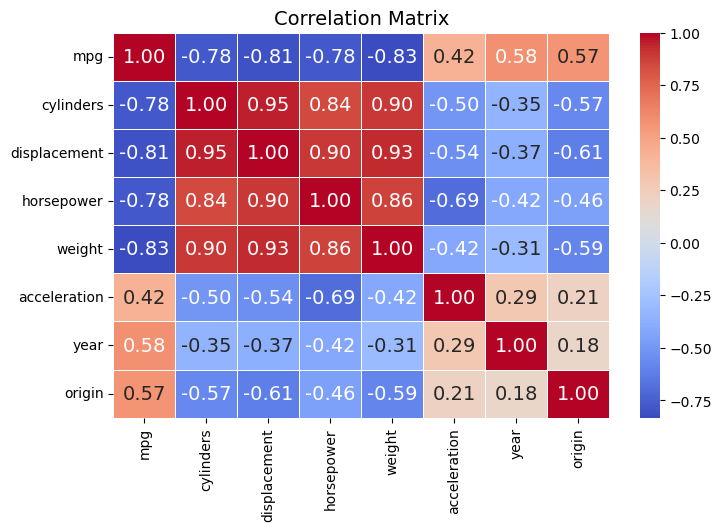

In [17]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))  

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()

In [18]:
# Use value_counts with normalize=True to calculate percentages
percentages = df_cleaned['origin'].value_counts(normalize=True) * 100

# Display the percentages
print("\nPercentages of each group:")
print(percentages)


Percentages of each group:
origin
1    62.500000
3    20.153061
2    17.346939
Name: proportion, dtype: float64


In [19]:
# Use value_counts with normalize=True to calculate percentages
percentages = df_cleaned['cylinders'].value_counts(normalize=True) * 100

# Display the percentages
print("\nPercentages of each group:")
print(percentages)


Percentages of each group:
cylinders
4    50.765306
8    26.275510
6    21.173469
3     1.020408
5     0.765306
Name: proportion, dtype: float64


*  Next, we write a function that keeps cars with 4, 6, and 8 cylinders, selects appropriate columns for input features and output labels, and returns them as DataFrames.

In [20]:
def filter_and_select_features(data):
    """
    Filters the dataset for cars with 4, 6, and 8 cylinders, 
    selects input features and output labels, and returns them as DataFrames.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing car data.

    Returns:
        X (pd.DataFrame): DataFrame containing input features.
        y (pd.DataFrame): DataFrame containing the output labels (mpg).
    """
    # Step 1: Filter rows for cars with 4, 6, and 8 cylinders
    filtered_data = data[data['cylinders'].isin([4, 6, 8])]
    
    # Step 2: Select columns for input features 
    input_columns = ["horsepower", "weight"]
    X = filtered_data[input_columns]
    
    # Step 3: Select the "mpg" column as the output label
    y = filtered_data[["mpg"]]
    
    return X, y

In [21]:
X, y = filter_and_select_features(df_cleaned)

X.head()

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449


In [22]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


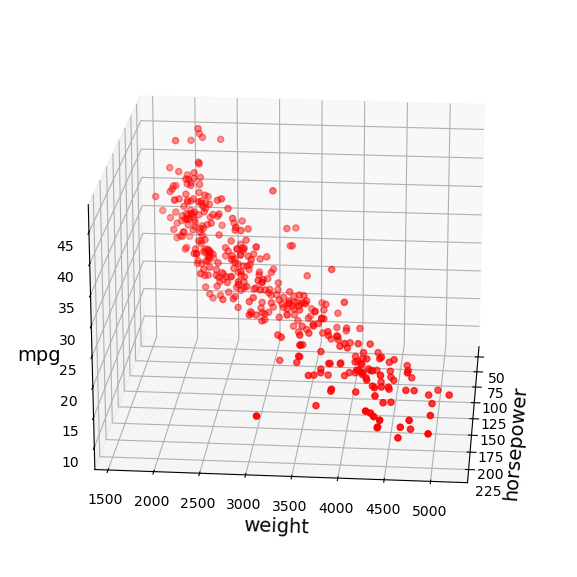

In [23]:
# 3D Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract data
x1 = X["horsepower"]
x2 = X["weight"]
x3 = y["mpg"]

# Create scatter plot
ax.scatter(x1, x2, x3, c='r', marker='o')

# Set labels
ax.set_xlabel("horsepower")
ax.set_ylabel("weight")
ax.set_zlabel("mpg")

ax.view_init(elev=20, azim=5)

plt.tight_layout()

plt.show()

* Hence, the regression problem can be viewed as 

\begin{equation}
\text{mpg} = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{weight}
\end{equation}

* Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated
    * Makes it difficult to assess the individual effect of each predictor on the dependent variable
    * Reduces model interpretability and reliability

* Here are several possible ways to address multicollinearity
    * Remove one or more of the highly correlated predictors
    * Combine correlated features into a single feature using aggregation or transformation
    * Apply penalties to large coefficients, reducing the impact of multicollinearity
    * Use models that handle multicollinearity well (e.g., Decision Trees)


# 2. Feature Engineering

* When features are in different ranges (e.g., weights and horsepowers), machine learning methods can behave poorly due to the dominance of larger-scaled features.

* Techniques to address scale issues:
    * Standardization: Rescales features to have a mean of 0 and standard deviation of 1. Useful for algorithms assuming Gaussian-like distributions or when feature magnitudes vary greatly.
    * Normalization: Rescales features to be in the range $[0, 1]$. Useful for algorithms sensitive to magnitude but not distribution.

* Equations ($\mu$ represents the mean and $\sigma$ is the standard deviation)

\begin{equation*}
z = \frac{x - \mu}{\sigma}
\end{equation*}

\begin{equation*}
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{equation*}




In [24]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
standardized = scaler.fit_transform(X)

X = pd.DataFrame(standardized, columns=X.columns)

X

,horsepower,weight
0,0.653742,0.611112
1,1.557988,0.832640
2,1.170454,0.531409
3,1.170454,0.527892
4,0.912098,0.546646
...,...,...
380,-0.483025,-0.225772
381,-1.361436,-0.999362
382,-0.534696,-0.805965
383,-0.663874,-0.419170


In [25]:
# Can we verify?

print("means:\n", X.sum(axis=0))

print("standard deviations:\n", X.std(axis=0))

means:
 horsepower    4.973799e-14
weight       -7.105427e-15
dtype: float64
standard deviations:
 horsepower    1.001301
weight        1.001301
dtype: float64


### Polynomial Transformation

* Polynomial transformation increases the dimensionality of your feature space by adding higher-degree combinations of features.
    * This can help capture complex, nonlinear relationships between the features and the target variable.

* Given two features, $x_1$ (horsepower) and $x_2$ (weight), a polynomial transformation of degree $d$ creates new features by including all combinations of $x_1$ and $x_2$ up to the given degree.
    * Degree 1: $x_1$ and $x_2$
    * Degree 2: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$
    
* Note that we can include "1", which corresponds to the bias term (intercept)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial transformation of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

# Create a DataFrame for better readability
feature_names = poly.get_feature_names_out(input_features=X.columns)

poly_X = pd.DataFrame(poly_features, columns=feature_names)

poly_X

,horsepower,weight,horsepower^2,horsepower weight,weight^2
0,0.653742,0.611112,0.427378,0.399509,0.373458
1,1.557988,0.832640,2.427326,1.297243,0.693289
2,1.170454,0.531409,1.369962,0.621989,0.282395
3,1.170454,0.527892,1.369962,0.617874,0.278670
4,0.912098,0.546646,0.831922,0.498595,0.298822
...,...,...,...,...,...
380,-0.483025,-0.225772,0.233313,0.109054,0.050973
381,-1.361436,-0.999362,1.853508,1.360568,0.998725
382,-0.534696,-0.805965,0.285900,0.430946,0.649579
383,-0.663874,-0.419170,0.440729,0.278276,0.175703


* Hence, the regression model works in the following form 

\begin{equation*}
y = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{weight} + \beta_3 \cdot \text{horsepower}^2 + \beta_4 \cdot \text{horsepower} \cdot \text{weight} + \beta_5 \cdot \text{weight}^2 
\end{equation*}


# 3. Data Splitting and Cross-Validation

* Train-Test Split: This is a crucial step in machine learning where you divide your data set into two parts:

    * Training set: Used to train the machine learning model.
    * Testing set: Used to evaluate the trained model's performance on unseen data.
    
    <img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/train_test.png?raw=true" width=350>
    


* Random Sampling:

    * Each data point has an equal chance of being assigned to either the training or testing set.
    * Simple and often sufficient for large, well-balanced data sets.

* Using `train_test_split`:

    * You can easily split your data using the `train_test_split` method from the `sklearn.model_selection` module.
    * Specify the desired `test_size` (e.g., 0.25 for a 25% test set) and set a `random_state` (e.g., random_state=42) to ensure that you get the same split every time you run your code. 
        * Your model's performance might vary significantly depending on the specific random split generated by the chosen `random_state`.
        * If you only evaluate with one split, you might get an overly optimistic or pessimistic estimate of how well your model generalizes.

In [27]:
X

,horsepower,weight
0,0.653742,0.611112
1,1.557988,0.832640
2,1.170454,0.531409
3,1.170454,0.527892
4,0.912098,0.546646
...,...,...
380,-0.483025,-0.225772
381,-1.361436,-0.999362
382,-0.534696,-0.805965
383,-0.663874,-0.419170


In [28]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
392,27.0
393,44.0
394,32.0
395,28.0


In [29]:
from sklearn.model_selection import train_test_split

# Random Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42) 



In [30]:
X_train

,horsepower,weight
340,-1.025573,-1.098991
334,-1.154751,-1.433041
101,1.170454,2.361066
172,-0.379683,0.267685
266,0.007851,-0.278517
...,...,...
71,0.653742,1.307343
106,-0.431354,-0.824718
270,0.266207,-0.219911
348,-0.741381,0.207907


In [31]:
y_train

,mpg
351,34.4
345,35.1
103,11.0
176,19.0
271,23.2
...,...
73,13.0
108,20.0
276,21.6
360,30.7


In [32]:
X_test

,horsepower,weight
268,-0.198834,-0.677033
250,-0.431354,-0.307819
355,-0.431354,-0.442612
332,-1.206422,-1.438902
56,-0.250505,-0.825890
...,...,...
66,2.668919,1.934420
301,-0.379683,-0.500045
7,2.849768,1.558174
19,-1.516450,-1.345133


In [33]:
y_test

,mpg
273,23.9
255,25.1
367,28.0
343,39.1
57,24.0
...,...
67,11.0
308,33.5
7,14.0
19,26.0


### Validation Set 

* Machine learning models have hyperparameters that need to be adjusted for optimal performance. For example, consider the polynomial transformation of the input features (degree 1 vs. 2)

\begin{equation}
\text{mpg} = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{weight}
\end{equation}

or 

\begin{equation*}
y = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{weight} + \beta_3 \cdot \text{horsepower}^2 + \beta_4 \cdot \text{horsepower} \cdot \text{weight} + \beta_5 \cdot \text{weight}^2 
\end{equation*}

* If you only have train and test sets, you might end up overfitting your model to the test set during hyperparameter tuning.
* This happens because you are repeatedly evaluating on the test set and indirectly "learning" its characteristics. 

* A separate validation or development set prevents this.

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/model_selection.png?raw=true" width=350>



In [34]:
# Assuming you already have this:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, split the training data again to create a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42  # Use a different test_size here
)

# You now have:
# - X_train, y_train: Training set
# - X_val, y_val: Validation set
# - X_test, y_test: Test set

In [35]:
print(X_train.shape, X_val.shape, X_test.shape)

(201, 2) (87, 2) (97, 2)


# Cross-Validation

* Challenges of Train-Test Split

    * Limited Data: Splitting data into three sets (train, validation, test) can significantly reduce the amount of data available for training, especially with smaller data sets.
    * Split Dependency: Results can vary depending on the random split of training and validation data.
* What is Cross-Validation (CV)?

    * No Separate Validation Set: CV eliminates the need for a dedicated validation set.
    * K-fold CV:
        * Divide the data into K equal-sized folds.
        * Train the model K times, each time using K-1 folds for training and the remaining fold for validation.
        * Average the performance across all K folds to get a more robust performance estimate.
        * A test set should still be held out for final evaluation, but the validation or development set is no longer needed when doing CV.
        
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=400>

* Benefits of CV:

    * More Effective Data Usage: Utilizes more data for training compared to having a separate validation set.
    * Reduced Split Dependency: Less sensitive to how the data is split, providing a more reliable performance estimate.
    
* Leave-One-Out Cross-Validation (LOOCV) is a special case of K-fold cross-validation where K is equal to the number of data points in your data set.
    * Each fold consists of a single data point.
    
* The `cross_val_score` function from `sklearn.model_selection` helps you evaluate your model's performance using K-fold cross-validation.

* Syntax: 
```Python
cross_val_score(estimator, X, y=None, scoring=None, cv=None)
```

* Parameters:

    * estimator: The model or object to use to fit the data. (e.g., `LinearRegression()`)
    * X: The data to fit. Can be, for example, a list, or an array.
    * y: The target variable to try to predict. (Optional for unsupervised learning)
    * scoring: A string or a callable to evaluate the predictions on the test set. (e.g., 'accuracy', 'f1', 'roc_auc')
    * cv: Determines the cross-validation splitting strategy (e.g., an integer for the number of folds)


In [36]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20) 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)  

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Calculate and print the average score
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.70059718 0.7104143  0.66820169 0.71583798 0.7355443 ]
Average cross-validation score: 0.7061190885527037


In [38]:
# Fit on full training data
model = LinearRegression()  
model.fit(X_train, y_train) 

# Evaluate using the test data 
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

print("final score:", r2_score(y_test, y_pred))

final score: 0.7307108559120061


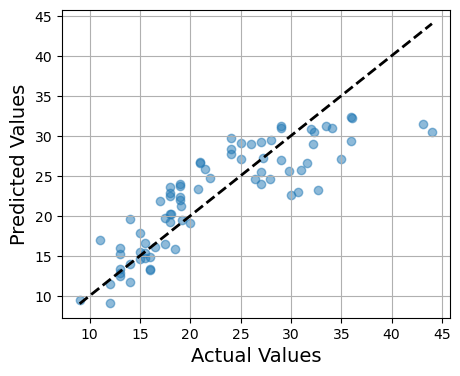

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5) 

# Add the 45-degree line
min_value = min(min(y_test.to_numpy()), min(y_pred))
max_value = max(max(y_test.to_numpy()), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'k--', lw=2)  # Dashed line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

* In the following, we will use `cross_val_score` to find the optimal degree of the polynomial transformation.

In [40]:
# Find the optimal degree using cross-validation
best_degree = 1  # Start with degree 1
best_cv_score = -np.inf 

for degree in range(1, 11):  # Check degrees from 1 to 10
    
    # Create polynomial features for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_poly, y_train, scoring='r2', cv=5)
    
    # Calculate the average
    mean_cv_score = np.mean(cv_scores)

    if mean_cv_score > best_cv_score:
        best_cv_score = mean_cv_score
        best_degree = degree

print(f"Best degree: {best_degree}")

Best degree: 2


In [41]:
best_cv_score

0.7244018699103643

In [42]:
# Fit on full training data
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
model = LinearRegression()  
model.fit(X_train_poly, y_train) 

# Evaluate using the test data 
y_pred = model.predict(poly.transform(X_test))

from sklearn.metrics import r2_score

print("final score:", r2_score(y_test, y_pred))

final score: 0.7773636448681317


* In sklearn, `cross_validate` is more versatile than `cross_val_score`, allowing evaluation of multiple metrics, access to training scores, and collection of additional information (e.g., fit time and score time).

In [43]:
from sklearn.model_selection import cross_validate

# Create polynomial features for the current degree
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
    
# Perform 5-fold cross-validation
results = cross_validate(model, X_train_poly, y_train, scoring='r2', cv=5)

print(results)

{'fit_time': array([0.00074697, 0.00128508, 0.00110722, 0.00113511, 0.00104809]), 'score_time': array([0.00110412, 0.00096798, 0.00088978, 0.00100303, 0.00096703]), 'test_score': array([0.76581346, 0.6830444 , 0.73132218, 0.67555006, 0.76627925])}

* Choose `cross_val_score` for simplicity and `cross_validate` for flexibility and more detailed insights.

# 4. Pipelines for Automated Preprocessing

* A pipeline is a way to chain together multiple data transformations and a final estimator (i.e., a machine learning model) into a single, cohesive object. 

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/pipeline.png?raw=true" width=500>

* It simplifies your code and ensures that the same steps are applied consistently during both training and prediction.

* Syntax 
```Python 
Pipeline(steps)
``` 

* Parameters: 
    * steps: List of `(name, transform)` tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.

In [44]:
from sklearn.pipeline import Pipeline

df = pd.read_csv("https://raw.githubusercontent.com/farhad-pourkamali/MATH4388Online/refs/heads/main/data/Auto.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df_cleaned = df.dropna()

# Select input features and outputs 
X, y = filter_and_select_features(df_cleaned)

X


,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449
...,...,...
392,86.0,2790
393,52.0,2130
394,84.0,2295
395,79.0,2625


In [45]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Feature scaling
    ('poly', PolynomialFeatures(degree=2)), # Polynomial features
    ('model', LinearRegression())           # Linear regression model
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=20)

# Fit the pipeline (all steps together)
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

print("final score:", r2_score(y_test, y_pred))


final score: 0.7773636448681318


### Recommended Reading
<hr style="border:2px solid gray">


* Chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb